# Exercices suite à la séance Pandas

Tous les exercices utilisent les données du fichier europresse_HC_suisse_mod.csv aussi disponible ici : https://raw.githubusercontent.com/pyshs/CUSO-2022-printemps/main/Data/europresse_HC_suisse_mod.csv

In [1]:
import pandas as pd
URL = "https://raw.githubusercontent.com/pyshs/CUSO-2022-printemps/main/Data/europresse_HC_suisse_mod.csv"
df = pd.read_csv(URL, parse_dates=['Date_reco']).drop(columns=['Unnamed: 0'])

## Exercice 1

La colonne 'Freq_chloro' contient la fréquence de la présence du terme "chloroquine" dans le contenu des articles

- renommez le nom de la colonne pour ne pas avoir de majuscules
- faites des statistiques descriptives de ce paramètre (min, max, moyenne, médiane)
- tracer l'histogramme de la distribution de cette colonne avec 10 barres distinctes
- filtrez le tableau pour ne garder que les articles qui ont la fréquence la plus forte du terme "chloroquine"

In [2]:
df.columns = list(df.columns[:-1])+["freq_chloro"]

In [3]:
df["freq_chloro"].describe()

count    237.000000
mean       2.177215
std        2.737496
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       20.000000
Name: freq_chloro, dtype: float64

In [4]:
df["freq_chloro"].agg(["median","mean","max","min"])

median     1.000000
mean       2.177215
max       20.000000
min        0.000000
Name: freq_chloro, dtype: float64

In [5]:
df["freq_chloro"].agg(["median","mean","max","min", sum])

median      1.000000
mean        2.177215
max        20.000000
min         0.000000
sum       516.000000
Name: freq_chloro, dtype: float64

<AxesSubplot:>

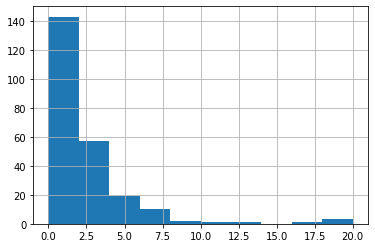

In [6]:
df["freq_chloro"].hist(bins=10)

In [7]:
df[df["freq_chloro"]>10]

,Date_reco,Date,Titre,Journal,Contenu,Auteur,Journaux-reco,freq_chloro
1,2020-03-26,"Science, jeudi 26 mars 2020 2170 mots, p. 9",Chloroquine: une recherche controversée,Le Temps,6675 @fabiengoubet Voilà un peu plus d'...,FABIEN GOUBET,Le Temps,19
2,2020-06-16,"Économie, mardi 16 juin 2020 1192 mots, p. 15",[Transport aérien...],"Tribune de Genève, no. 5326",Transport aérien Qatar Airways va réduire ...,NaN,Tribune de Genève,20
3,2020-03-18,"Science, mercredi 18 mars 2020 1022 mots, p. 9",Une piste pour lutter contre le SARS-CoV-2,Le Temps,6668 (LE MONDE) La course aux traitemen...,SANDRINE CABUT,Le Temps,18
4,2020-03-20,"Point fort, vendredi 20 mars 2020 1558 mots,...",[Coronavirus...],"24 Heures (Suisse), no. 4306 Région, Lausanne",Coronavirus De la chloroquine contre le vi...,NaN,24 Heures,16
6,2020-03-25,"Genève, mercredi 25 mars 2020 878 mots, p. 4",[Chloroquine...],"Tribune de Genève, no. 4356",Chloroquine Débat autour d'un « remède mir...,NaN,Tribune de Genève,12


## Exercice 2

- créez une nouvelle colonne du tableau qui contient l'information du nombre de mots de l'article (contenu dans la colonne 'Contenu') - *indice, pensez à procéder en deux temps avec la méthode "apply".*
- regardez la documentation de la méthode plot de Pandas pour faire un nuage de point (scatter) des deux colonnes numériques nombre de mots et nombre d'occurence de chloroquine
- Utilisez la méthode "corr" d'un DataFrame pour calculer le coefficient de corrélation linéaire entre ces deux données numériques

In [5]:
def nb_mots(x):
    return len(x.split(" "))
df["nb_mots"] = df["Contenu"].apply(nb_mots)

### Zoologie

Fonction lambda.

Pour des functions très simple on peut utiliser des "fonctions anonymes", ou `lambda functions`.



```python
nb_mots = lambda x: len(x.split(" "))
```

```
df["nb_mots"] = df["Contenu"].apply(lambda x: len(x.split(" ")))
```

<AxesSubplot:xlabel='nb_mots', ylabel='freq_chloro'>

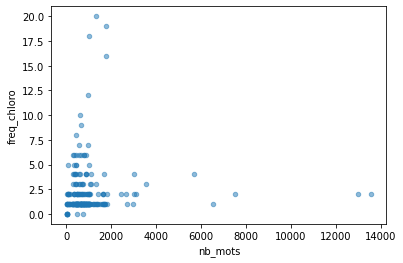

In [9]:
df.plot(kind="scatter", x="nb_mots", y="freq_chloro",alpha=0.5) 

In [10]:
df[["nb_mots","freq_chloro"]].corr()

,nb_mots,freq_chloro
nb_mots,1.000000,0.049273
freq_chloro,0.049273,1.000000


## Exercice 3

La méthode "groupby" d'un DataFrame permet de regrouper le tableau par les modalités d'une colonne. 

- En l'utilisant, calculez la moyenne du nombre de mots par journal.
- Faites une représentation graphique adaptée avec "plot"

In [11]:
df.groupby("Journaux-reco")["nb_mots"].mean()

Journaux-reco
24 Heures             967.900000
Autre                5080.000000
Bilan                 701.153846
La Liberté             47.200000
Le Matin              900.647059
Le Temps              865.090909
Tribune de Genève     811.854545
Name: nb_mots, dtype: float64

<AxesSubplot:xlabel='Journaux-reco'>

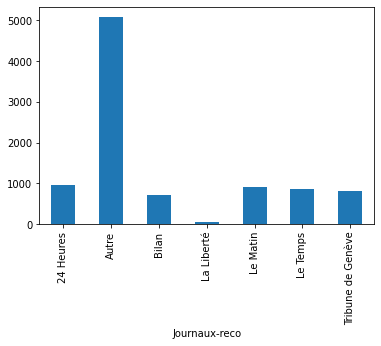

In [12]:
df.groupby("Journaux-reco")["nb_mots"].mean().plot(kind="bar")

<AxesSubplot:title={'center':'nb_mots'}, xlabel='Journaux-reco'>

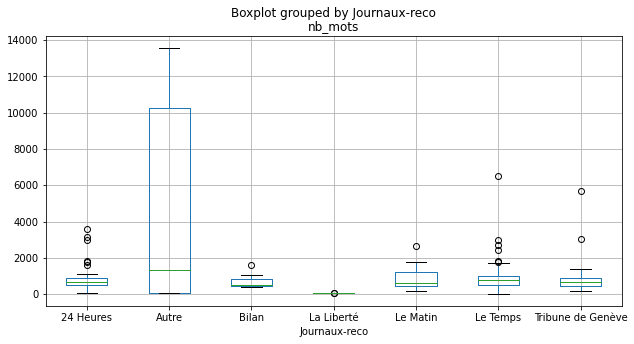

In [13]:
df.boxplot(column="nb_mots", by="Journaux-reco", figsize=(10,5))
# or df.plot.box(...)

In [14]:
df.groupby(["Journaux-reco",'Auteur']).sum()

freq_chloro  \
Journaux-reco     Auteur                                                            
Autre             Boluwaduro, Eniola                                            2   
                  Kisitu, Jaffar - Hollert, Henner - Fisher, Ciar...            2   
Bilan             Loup                                                          1   
                  par AFP                                                       1   
                  par AWP                                                       7   
                  par AWP/AFP                                                  12   
                  par AWP/ATS                                                   1   
                  par Rebecca Garcia                                            1   
Le Temps          AFP                                                           1   
                  ALINE BASSIN                                                  3   
                  ANOUCH SEYDTAGHIA                                             3   
                  ANTOINE DUPLAN                                                1   
                  Alain Lallemand, envoyé spécial à Banda Aceh                  1   
                  Anne Crisinel                                                 1   
                  Anton Vos                                                     2   
                  Arnaud Dubus, envoyé spécial sur l'île de Jolo                0   
                  BORIS BUSSLINGER                                              3   
                  BÉATRICE HOUCHARD                                             1   
                  CATHERINE FRAMMERY                                            1   
                  CATHERINE MCCABE                                              1   
                  CHAMS IAZ                                                     1   
                  CHANTAL RAYES                                                 2   
                  CHANTAL RAYES; SÃO PAULO                                      1   
                  CÉDRIC GARROFÉ                                                1   
                  CÉLINE ZÜND                                                   4   
                  DR. MÉD. VÉT. OLIVIER J. GLARDON                              1   
                  FABIEN GOUBET                                                54   
                  FABIEN GOUBET; SYLVIE LOGEAN; PASCALINE MINET                 1   
                  FABIEN PERRIER                                                4   
                  FRÉDÉRIC KOLLER                                               1   
                  HERVÉ MORIN; PAUL BENKIMOUN                                   1   
                  JACQUES NEIRYNCK                                              1   
                  JOËLLE KUNTZ                                                  1   
                  Le Temps                                                      6   
                  MALKA GOUZER                                                  1   
                  MARC ALLGÖWER                                                 1   
                  MARIE MAURISSE                                                5   
                  MARIE-HÉLÈNE MIAUTON                                          1   
                  MICHEL LECLERCQ; RIO DE JANEIRO                               1   
                  NICOLAS DUFOUR                                                1   
                  PASCALINE MINET                                               2   
                  RACHEL RICHTERICH                                             1   
                  RAM ETWAREEA                                                  2   
                  RICHARD ETIENNE                                               2   
                  RICHARD WERLY                                                11   
                  RICHARD ÉTIENNE                                          

In [15]:
df.groupby(['Auteur',"Journaux-reco"]).sum()

,,freq_chloro,nb_mots
Auteur,Journaux-reco,,
AFP,Le Temps,1,318
ALINE BASSIN,Le Temps,3,728
ANOUCH SEYDTAGHIA,Le Temps,3,1550
ANTOINE DUPLAN,Le Temps,1,497
"Alain Lallemand, envoyé spécial à Banda Aceh",Le Temps,1,746
Anne Crisinel,Le Temps,1,1144
Anton Vos,Le Temps,2,1738
"Arnaud Dubus, envoyé spécial sur l'île de Jolo",Le Temps,0,775
BORIS BUSSLINGER,Le Temps,3,2545


## Exercice 4


Comment calculer une nouvelle colonne avec la densité du mot chloroquine, avec la densité définie comme $\frac{n_{terme}}{n_{total}}$ où $n_{terme}$ est la fréquence du mot et $n_{total}$ est le nombre total de mots de l'article ?

Indice A : La méthode 'apply' existe sur une Series mais aussi sur un DataFrame, avec un comportement différent qui permet d'appliquer une fonction sur chaque colonne (axis=0) ou sur chacune des lignes (axis=1), la ligne/colonne étant alors passées comme argument sous la forme d'un dictionnaire.

In [16]:
def densitee(l):
    return l["freq_chloro"]/l["nb_mots"]
df["densitee_chloro"] = df.apply(densitee, axis=1)

## Exercice Bonus

Comment feriez-vous pour recréer la colonne "Journaux_reco" à partir de la colonne "Journal" contenant les données "brutes" ?

- une fonction dédiée qui se base sur des règles spécifiques (ex : si Tribune dans le nom, alors renvoyer La Tribune)
- appliquée ensuite à la colonne